In [2]:
#importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#lectura

import gdown

url = 'https://drive.google.com/uc?id=1xVWcZOzTHdfmx-KxVe9BGN9FkdVr9y2p'
output = 'olist_products_dataset.csv'
gdown.download(url, output, quiet=False)

# Ahora lee el archivo CSV
data = pd.read_csv(output, sep=';')

Downloading...
From: https://drive.google.com/uc?id=1xVWcZOzTHdfmx-KxVe9BGN9FkdVr9y2p
To: /content/olist_products_dataset.csv
100%|██████████| 2.51M/2.51M [00:00<00:00, 159MB/s]


In [3]:
print(data.shape)
data.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [4]:
#Variables categoricas y numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_lenght         32951 non-null  int64 
 3   product_description_lenght  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


In [5]:
columnas=[]

for e in data:
  columnas.append(e)

print(columnas)

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [6]:
#Conteo de los niveles en las diferentes columnas categoricas

for col in columnas:
  print(f'Columna{col}:{data[col].nunique()}subniveles')

Columnaproduct_id:32951subniveles
Columnaproduct_category_name:74subniveles
Columnaproduct_name_lenght:67subniveles
Columnaproduct_description_lenght:2961subniveles
Columnaproduct_photos_qty:20subniveles
Columnaproduct_weight_g:2204subniveles
Columnaproduct_length_cm:100subniveles
Columnaproduct_height_cm:103subniveles
Columnaproduct_width_cm:96subniveles


In [7]:
data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [8]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set despues de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (32951, 9)
Tamaño del set despues de eliminar las filas repetidas: (32951, 9)


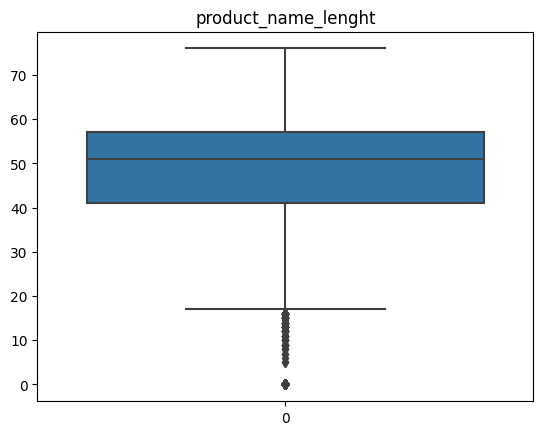

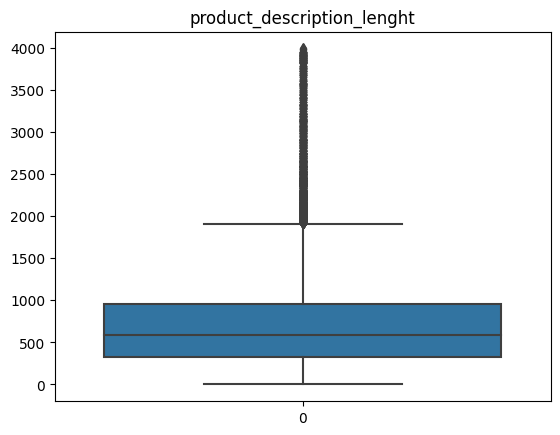

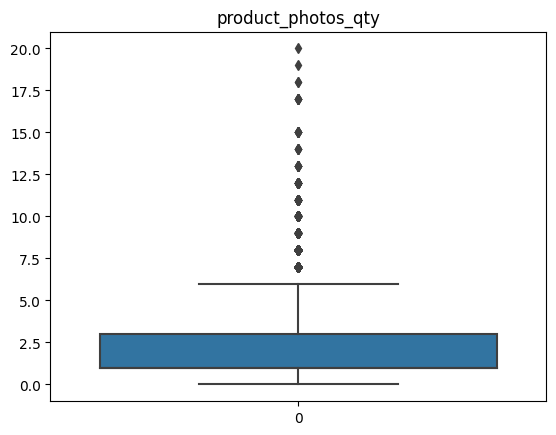

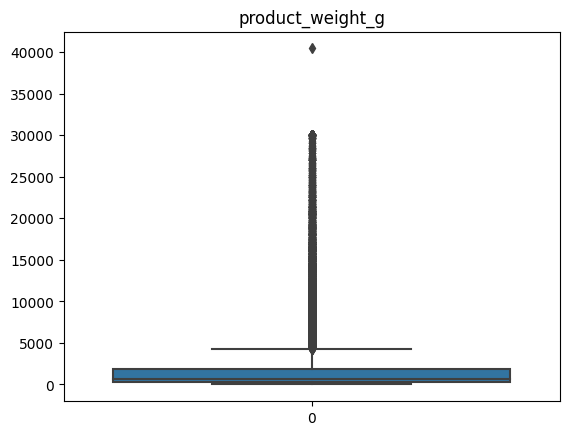

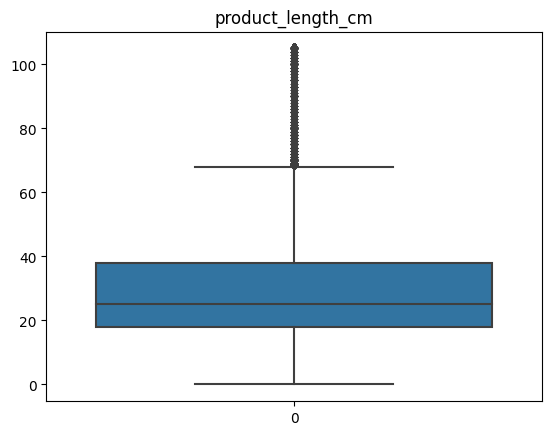

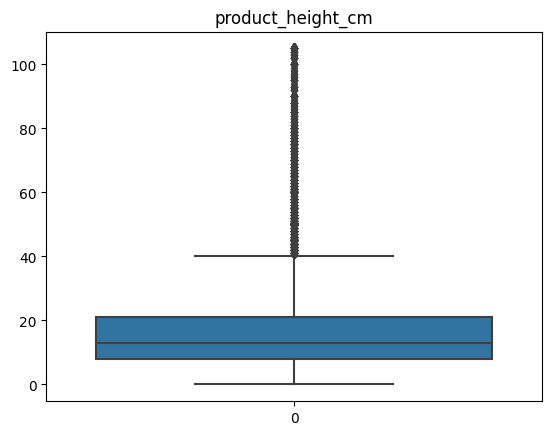

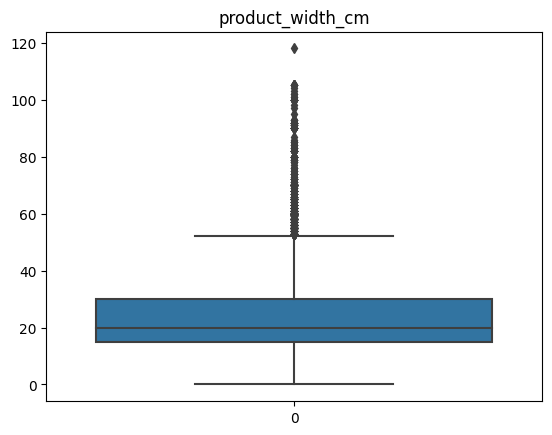

In [10]:
#Outliers en las variables numericas
#Grafica tipo boxplot

columnas=['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']

for e in columnas:
  grafico = sns.boxplot(data=data[e])
  grafico.set(title=e)
  plt.show()